In [1]:
import matplotlib.pyplot as plt
import glob
import os
import random
from random import randrange
import csv
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

In [2]:
rootDir = 'L:/DATA/Alouette_I/BATCH_II_Run2/'
processedDir = rootDir + '04_processed/'
resultDir = rootDir + '07_MQA/'
imageDir = rootDir + '04_processed/'
logDir = rootDir + '06_log/'

In [3]:
sample_size = 5

## Num Category

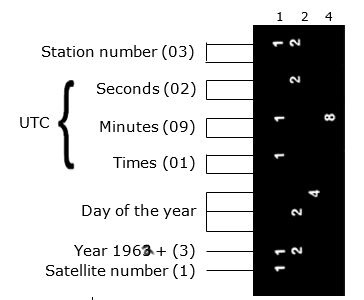

In [10]:
df_master = pd.read_csv(resultDir + 'Original_data.csv')
filter_df_num = df_master[df_master['processed_image_class']=='num']
selected_rows_num = filter_df_num.sample(sample_size)
print(selected_rows_num)

         Directory Subdirectory filename processed_image_class      fmin  \
42208   R014207961         1053  245.png                   num  1.500000   
63574   R014207963      1564-1B  193.png                   num  1.524194   
100316  R014207944      2005-5B   20.png                   num  1.508065   
92597   R014207950     2500-8-A   71.png                   num  1.580645   
2337    R014207819      4757-15   77.png                   num  1.520161   

          max_depth            Timestamp  time_quality  Station_Number  \
42208   1290.000000  1965-10-24 08:50:54           1.0             9.0   
63574    590.000000  1966-03-10 03:26:57           1.0             1.0   
100316  1382.692308  1966-09-24 22:37:12           1.0             5.0   
92597   1160.784314  1966-08-22 20:58:26           1.0             8.0   
2337    1453.333333  1963-01-10 11:12:01           1.0             1.0   

       Station_Code                       Station_Name    Lat    Lng  
42208           SOL  Falkla

In [12]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['filename']
    image_path = os.path.join(imageDir, directory, subdirectory, filename)
    
    if os.path.exists(image_path):
        print ("Image Path:", image_path)
        image = Image.open(image_path)
        image.show()
    else: 
        print ("Image not found", image_path)
    

Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207961\1053\245.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207963\1564-1B\193.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207944\2005-5B\20.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207950\2500-8-A\71.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207819\4757-15\77.png


In [14]:
second_data = []
for i in range (5):
    print('\n\n')
    print ("Please read the metadata for each of the 5 images above and the values in the boxes below")
    print ("Write N/A if any of the values were not present or not easy to read.")
    Directory = input ("Add the Directory: ")
    Subdirectory = input("Add the Subdirectory: ")
    filename = input ("Add the png name: ")
    processed_image_class = input ("Add procssed image class: ")
    Timestamp = input ("Add the timestamp in the YY-MM-DD formart: ")
    Station_Number = input ("station number: ")
    second_data.append([Directory, Subdirectory, filename, processed_image_class, Timestamp, Station_Number])
with open ('L:/DATA/Alouette_I/BATCH_II_Run2/07_MQA/Batch2_QA_num.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "filename","processed_image_class", "TimeStamp", "Station_Number"])
    for row in second_data:
        #row.insert(0, directory)
        #row.insert (1, subdirectory)
        print(row)
        writer.writerow(row)




Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207961
Add the Subdirectory: 1053
Add the png name: 245.png
Add procssed image class: num
Add the timestamp in the YY-MM-DD formart: 1965-10-24 08:50:54
station number: 9.0



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207963
Add the Subdirectory: 1564-1B
Add the png name: 193.png
Add procssed image class: num
Add the timestamp in the YY-MM-DD formart: 1966-03-10 03:26:57
station number: 1.0



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207944
Add the Subdirectory: 2005-5B
Add the png name: 20.png
Add procssed image class: num
Add 

Total number of NUM scanned Ionograms: 123975
Number of Images Analyzed: 50
Number of ionograms categorized correctly: 44
Estimated Success Rate out of 123975 with consistent results: 109098


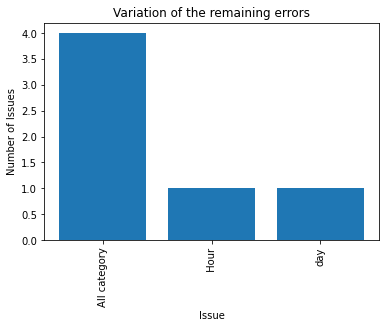

Number of NUM2 ionograms categorized as Num data by the algorithm: 4
     Directory Subdirectory filename
11  R014207820      2979-5B  109.png
16  R014207825     3729-19A  105.png
44  R014207808      4575-50   14.png
49  R014207819      4757-15   77.png


In [5]:
#Total Number of Num Categories
df_master = pd.read_csv(resultDir + 'Original_data.csv')
filter_df_num = df_master[df_master['processed_image_class']=='num']
total_df_master = len(filter_df_num)
print ('Total number of NUM scanned Ionograms:', total_df_master)

#Total number of Ionograms analyzed
df_num = pd.read_csv("L:/DATA/Alouette_I/BATCH_II_Run2/07_MQA/Batch2_QA_num.csv")
total_len = len(df_num)
print ('Number of Images Analyzed:', total_len)


# filtering out correct categories
df_num = df_num.loc[df_num['Issue'] != 'None']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*total_df_master)
print('Estimated Success Rate out of 123975 with consistent results:', Estimation)

#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()

# Number of All categories error
df_num = df_num.loc[df_num['Issue'] == 'All category']
filtered_down_len = len(df_num)
print('Number of NUM2 ionograms categorized as Num data by the algorithm:', filtered_down_len)
print(df_num.loc[:,["Directory","Subdirectory", "filename"]])

## Dot Catergory

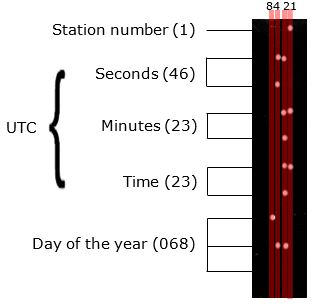

In [12]:
df_master = pd.read_csv(resultDir + 'Original_data.csv')
filter_df_dot = df_master[df_master['processed_image_class']=='dot']
selected_rows_dot = filter_df_dot.sample(sample_size)
print(selected_rows_dot)

        Directory Subdirectory filename processed_image_class      fmin  \
20     R014207961       1031-A  178.png                   dot  1.592742   
590    R014207944      2042-3A  125.png                   dot  1.500000   
10475  R014207961       1031-A  154.png                   dot  1.633065   
830    R014207961       1076-A  158.png                   dot  1.512097   
12240  R014207961       1065-A  231.png                   dot  1.625000   

         max_depth            Timestamp  time_quality  Station_Number  \
20     1461.224490  1962-10-07 00:00:00           3.0             9.0   
590    1217.241379  1962-10-09 00:00:00           4.0             9.0   
10475  1461.224490  1963-06-29 00:00:00           4.0             1.0   
830    1286.000000  1962-10-15 12:08:00           2.0            11.0   
12240  1420.408163  1963-07-07 00:00:00           4.0             9.0   

      Station_Code                       Station_Name    Lat     Lng  
20             SOL  Falkland Islands (I

In [13]:
for _, row in selected_rows_dot.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['filename']
    image_path = os.path.join(imageDir, directory, subdirectory, filename)
    
    if os.path.exists(image_path):
        print ("Image Path:", image_path)
        image = Image.open(image_path)
        image.show()
    else: 
        print ("Image not found", image_path)

Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207961\1031-A\178.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207944\2042-3A\125.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207961\1031-A\154.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207961\1076-A\158.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207961\1065-A\231.png


In [14]:
second_data = []
for i in range (5):
    print('\n\n')
    print ("Please read the metadata for each of the 5 images above and the values in the boxes below")
    print ("Write N/A if any of the values were not present or not easy to read.")
    Directory = input ("Add the Directory: ")
    Subdirectory = input("Add the Subdirectory: ")
    filename = input ("Add the png name: ")
    processed_image_class = input ("Add procssed image class: ")
    Timestamp = input ("Add the timestamp in the YY-MM-DD formart: ")
    Station_Number = input ("station number: ")
    second_data.append([Directory, Subdirectory, filename, processed_image_class, Timestamp, Station_Number])
with open ('L:/DATA/Alouette_I/BATCH_II_Run2/07_MQA/Batch2_QA_dot.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "filename","processed_image_class", "TimeStamp", "Station_Number"])
    for row in second_data:
        #row.insert(0, directory)
        #row.insert (1, subdirectory)
        print(row)
        writer.writerow(row)




Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207961
Add the Subdirectory: 1031-A
Add the png name: 178.png
Add procssed image class: num
Add the timestamp in the YY-MM-DD formart: 1965-08-10 09:28:34
station number: 1



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207944
Add the Subdirectory: 2042-3A
Add the png name: 125.png
Add procssed image class: num
Add the timestamp in the YY-MM-DD formart: 1967-11-19 20:51:50
station number: 3



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207961
Add the Subdirectory: 1031-A
Add the png name: 154.png
Add procssed image class: num
Add th

Total number of dot scanned Ionograms: 123975
Number of Images Analyzed: 15
Number of Ionograms Analyzed correctly: 0
Estimated Success Rate out of 4481 with consistent results: 0.0


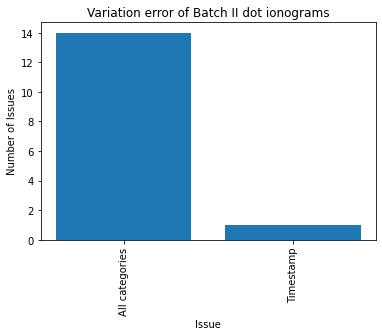

Number of NUM/NUM2 ionograms categorized as dot data by the algorithm: 14
     Directory Subdirectory filename
0   R014207961       1039-1  283.png
1   R014207961       1069-A  297.png
3   R014207944     1994-12A  131.png
4   R014207961       1076-A  288.png
5   R014207961       1039-1   19.png
6   R014207961       1069-A  263.png
7   R014207944      2042-3A  272.png
8   R014207961       1058-A  336.png
9   R014207961       1029-A  129.png
10  R014207961       1031-A  178.png
11  R014207944      2042-3A  125.png
12  R014207961       1031-A  154.png
13  R014207961       1076-A  158.png
14  R014207961       1065-A  231.png


In [8]:
#Total Number of dot Categories
df_master = pd.read_csv(resultDir + 'Original_data.csv')
filter_df_dot = df_master[df_master['processed_image_class']=='dot']
total_df_master = len(filter_df_num)
print ('Total number of dot scanned Ionograms:', total_df_master)

#Total number of Ionograms analyzed
df_dot = pd.read_csv("L:/DATA/Alouette_I/BATCH_II_Run2/07_MQA/Batch2_QA_dot.csv")
total_len_dot = len(df_dot)
print ('Number of Images Analyzed:', total_len_dot)
filtered_down_len = 0 #no ionogram was analyzed correctly
print('Number of Ionograms Analyzed correctly:',filtered_down_len)

#Estimated success rate
success_rate = filtered_down_len/total_len_dot
Estimation = success_rate*total_df_master
print('Estimated Success Rate out of 4481 with consistent results:', Estimation)


#Plotting the variation of issues
issue_counts_dot = df_dot["Issue"].value_counts()
plt.bar(issue_counts_dot.index, issue_counts_dot.values)
plt.title ("Variation error of Batch II dot ionograms")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()

# filtering out correct categories
df_dot = df_dot.loc[df_dot['Issue'] == 'All categories']
filtered_down_len_dot = len(df_dot)
print('Number of NUM/NUM2 ionograms categorized as dot data by the algorithm:', filtered_down_len_dot)
print(df_dot.loc[:,["Directory","Subdirectory", "filename"]])

## Num 2 Category

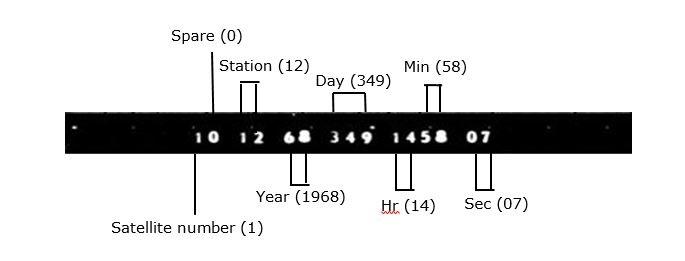

In [4]:
df_master = pd.read_csv(resultDir + 'Original_data.csv')
filter_df_num2 = df_master[df_master['processed_image_class']=='num2']
selected_rows_num2 = filter_df_num2.sample(sample_size)
print(selected_rows_num2)

         Directory Subdirectory filename processed_image_class      fmin  \
204359  R014207828     4447-08A   91.png                  num2  1.500000   
185662  R014207818    4214-69-2  220.png                  num2  1.524194   
129223  R014207826    3896-50-3    6.png                  num2  1.500000   
185270  R014207839      4115-43  163.png                  num2  1.629032   
196450  R014207833     4345-03A   64.png                  num2  1.500000   

          max_depth            Timestamp  time_quality  Station_Number  \
204359  1428.571429  1968-03-02 18:56:25           1.0             8.0   
185662  1396.000000  1967-08-31 01:11:05           1.0            69.0   
129223  1004.255319  1967-02-13 23:18:51           1.0            50.0   
185270  1375.510204  1967-08-28 20:14:13           1.0            43.0   
196450   654.000000  1967-11-14 21:34:49           1.0             3.0   

       Station_Code              Station_Name    Lat    Lng  
204359          SNT           Santia

In [5]:
for _, row in selected_rows_num2.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['filename']
    image_path = os.path.join(imageDir, directory, subdirectory, filename)
    
    if os.path.exists(image_path):
        print ("Image Path:", image_path)
        image = Image.open(image_path)
        image.show()
    else: 
        print ("Image not found", image_path)

Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207828\4447-08A\91.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207818\4214-69-2\220.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207826\3896-50-3\6.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207839\4115-43\163.png
Image Path: L:/DATA/Alouette_I/BATCH_II_Run2/04_processed/R014207833\4345-03A\64.png


In [6]:
second_data = []
for i in range (5):
    print('\n\n')
    print ("Please read the metadata for each of the 5 images above and the values in the boxes below")
    print ("Write N/A if any of the values were not present or not easy to read.")
    Directory = input ("Add the Directory: ")
    Subdirectory = input("Add the Subdirectory: ")
    filename = input ("Add the png name: ")
    processed_image_class = input ("Add procssed image class: ")
    Timestamp = input ("Add the timestamp in the YY-MM-DD formart: ")
    Station_Number = input ("station number: ")
    second_data.append([Directory, Subdirectory, filename, processed_image_class, Timestamp, Station_Number])
with open ('L:/DATA/Alouette_I/BATCH_II_Run2/07_MQA/Batch2_QA_num2.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "filename","processed_image_class", "TimeStamp", "Station_Number"])
    for row in second_data:
        #row.insert(0, directory)
        #row.insert (1, subdirectory)
        print(row)
        writer.writerow(row)




Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207828
Add the Subdirectory: 4447-08A
Add the png name: 91.png
Add procssed image class: num2
Add the timestamp in the YY-MM-DD formart: 1968-03-02 18:56:25
station number: 08



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207818
Add the Subdirectory: 4214-69-2
Add the png name: 220.png
Add procssed image class: num2
Add the timestamp in the YY-MM-DD formart: 1967-08-31 01:11:05
station number: 69



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207826
Add the Subdirectory: 3896-50-3
Add the png name: 6.png
Add procssed image class: nu

Total number of NUM scanned Ionograms: 87924
Number of Images Analyzed: 34
Number of Ionograms categorized correctly: 31
Estimated Success Rate out of 87924 NUM2 data with consistent results: 80166


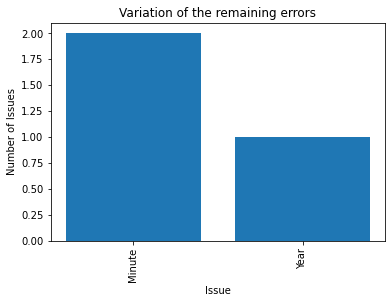

Number of NUM2 "Minutes" categorized inccorectly: 2
Algorithm read 1 and 7 interchangbly!
    Directory Subdirectory filename
5  R014207831      3949-5A  207.png
8  R014207833      4349-38  136.png


In [6]:
#Total Number of Num2 Categories
df_master = pd.read_csv(resultDir + 'Original_data.csv')
filter_df_num2 = df_master[df_master['processed_image_class']=='num2']
total_df_master = len(filter_df_num2)
print ('Total number of NUM scanned Ionograms:', total_df_master)

#Total number of Ionograms analyzed
df_num2 = pd.read_csv("L:/DATA/Alouette_I/BATCH_II_Run2/07_MQA/Batch2_QA_num2.csv")
total_len = len(df_num2)
print ('Number of Images Analyzed:', total_len)

# filtering out correct categories
df_num2 = df_num2.loc[df_num2['Issue'] != 'None']
filtered_down_len = len(df_num2)
print('Number of Ionograms categorized correctly:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*total_df_master)
print('Estimated Success Rate out of 87924 NUM2 data with consistent results:', Estimation)

#Plotting the variation of issues
issue_counts_num2 = df_num2["Issue"].value_counts()
plt.bar(issue_counts_num2.index, issue_counts_num2.values)
plt.title ("Variation of the remaining errors")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()

# Number of Minute error
df_num2 = df_num2.loc[df_num2['Issue'] == 'Minute']
filtered_down_len = len(df_num2)
print('Number of NUM2 "Minutes" categorized inccorectly:', filtered_down_len)
print('Algorithm read 1 and 7 interchangbly!')
print(df_num2.loc[:,["Directory","Subdirectory", "filename"]])